In [1]:
# Using a circuit(described below) to create the bell states in which both the qubits are entangled.
# Then I will perform some measurements to check the nature of this entanglement.

import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
provider = IBMQ.providers()[0]

In [3]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [4]:
backend = provider.get_backend('ibmq_qasm_simulator')

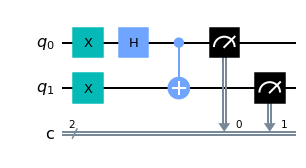

In [5]:
# Here I at first use a Hadamard gate to create a qubit in superposition of 0 and 1
# then applying a controlled not on the other qubit with the qubit in superposition acting as the control bit.
qCircuit = QuantumCircuit(2, 2)

# Encoding the input here
# both the qubits will be 1 after this encoding, and the bell states created will be (\01> - \10>)/sqrt(2)
qCircuit.x(0)
qCircuit.x(1)
# Encoding ends here

# Applying the Hadamard gate on the fist qubit
qCircuit.h(0)

# Controlled-NOT gate on 1st and 2nd bit.
qCircuit.cx(0, 1)

# Now let's measure the bits(so excited ...)
qCircuit.measure(0, 0)
qCircuit.measure(1, 1)

# see if the circuit is right or not
qCircuit.draw()

In [6]:
# assembling the circuit for the backend
qObj = assemble(qCircuit)

# the result, after the circuit runs on the backend, contains the counts (and thus the probabilities) of all measuring possibilities.
result = backend.run(qObj).result()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:814: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name, job_share_level=job_share_level,


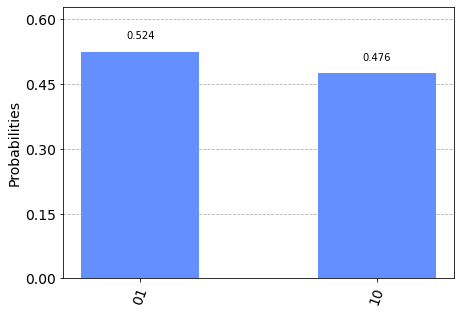

In [9]:
count = result.get_counts()
plot_histogram(count)
# Seeing this histogram confirms the entanglement (with half of the time qubit observed is 01 and other half is 1*)
# So measuring 1 on the first qubit tells with certainty that the second qubit is 1. Similarly, the reverse is also true.